# Graphical exploratory data analysis

Before diving into sophisticated statistical inference techniques, we should first explore our data by plotting them and computing simple summary statistics. This process, called **exploratory data analysis**, is a crucial first step in statistical analysis of data.

## Introduction to Exploratory Data Analysis

Exploratory Data Analysis is the process of organizing, plo!ing, and summarizing a data set

>“Exploratory data analysis can never be the
whole story, but nothing else can serve as the
foundation stone. ” > ~ John Tukey

### Tukey's comments on EDA

* Exploratory data analysis is detective work.
* There is no excuse for failing to plot and look.
* The greatest value of a picture is that it forces us to notice what we never expected to see.
* It is important to understand what you can do before you learn how to measure how well you seem to have done it.

> If you don't have time to do EDA, you really don't have time to do hypothesis tests. And you should always do EDA first.

### Advantages of graphical EDA

* It often involves converting tabular data into graphical form.
* If done well, graphical representations can allow for more rapid interpretation of data.
* There is no excuse for neglecting to do graphical EDA.

> While a good, informative plot can sometimes be the end point of an analysis, it is more like a beginning: it helps guide you in the quantitative statistical analyses that come next.

## Plotting a histogram

### Plotting a histogram of iris data

We will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is [available as part of scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Here, you will work with his measurements of petal length.

We will plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. 

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array `versicolor_petal_length`.

# Libraries

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Set default Seaborn style
sns.set()

%matplotlib inline

In [2]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

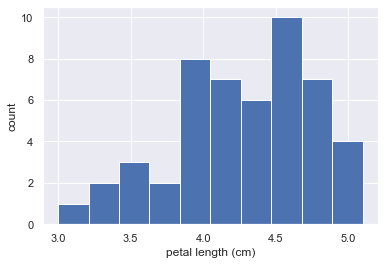

In [3]:
# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)
plt.ylabel("count")
plt.xlabel("petal length (cm)")
plt.show()

### Adjusting the number of bins in a histogram

The histogram we just made had ten bins. This is the default of matplotlib. 

>Tip: The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 

We will plot the histogram of _Iris versicolor petal lengths_ again, this time using the square root rule for the number of bins. You specify the number of bins using the `bins` keyword argument of `plt.hist()`.

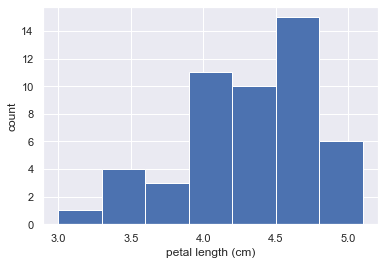

In [4]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## Plot all data: Bee swarm plots

### Bee swarm plot

We will make a bee swarm plot of the iris petal lengths. The x-axis will contain each of the three species, and the y-axis the petal lengths. 

In [5]:
iris_petal_lengths = pd.read_csv("../datasets/iris_petal_lengths.csv")
iris_petal_lengths.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_petal_lengths.shape

(150, 5)

In [7]:
iris_petal_lengths.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


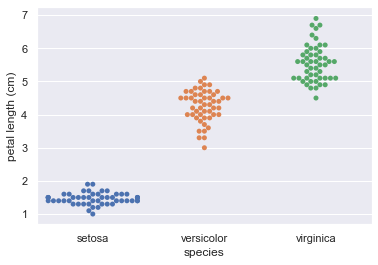

In [8]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(data=iris_petal_lengths, x="species", y="petal length (cm)")

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")
# Show the plot

plt.show()

### Interpreting a bee swarm plot

* _I. virginica_ petals tend to be the longest, and _I. setosa_ petals tend to be the shortest of the three species.

> Note: Notice that we said **"tend to be."** Some individual _I. virginica_ flowers may be shorter than individual _I. versicolor_ flowers. It is also possible that an individual _I. setosa_ flower may have longer petals than in individual _I. versicolor_ flower, though this is highly unlikely, and was not observed by Anderson.

## Plot all data: ECDFs

> Note: Empirical cumulative distribution function (ECDF)

### Computing the ECDF

We will write a function that takes as input a 1D array of data and then returns the `x` and `y` values of the ECDF.

> Important: ECDFs are among the most important plots in statistical analysis. 

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


### Plotting the ECDF

We will now use `ecdf()` function to compute the ECDF for the petal lengths of Anderson's _Iris versicolor_ flowers. We will then plot the ECDF.

> Warning: `ecdf()` function returns two arrays so we will need to unpack them. An example of such unpacking is `x, y = foo(data)`, for some function `foo()`.

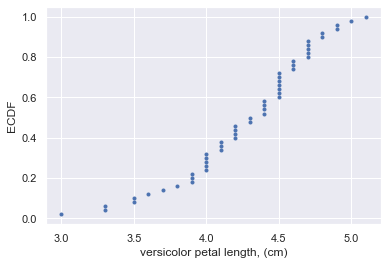

In [10]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")

# Label the axes
_ = plt.xlabel("versicolor petal length, (cm)")
_ = plt.ylabel("ECDF")

# Display the plot
plt.show()


### Comparison of ECDFs

ECDFs also allow us to compare two or more distributions ***(though plots get cluttered if you have too many)***. Here, we will plot ECDFs for the petal lengths of all three iris species. 

> Important: we already wrote a function to generate ECDFs so we can put it to good use!

In [12]:
setosa_petal_length = iris_petal_lengths["petal length (cm)"][iris_petal_lengths.species == "setosa"]
versicolor_petal_length = iris_petal_lengths["petal length (cm)"][iris_petal_lengths.species == "versicolor"]
virginica_petal_length = iris_petal_lengths["petal length (cm)"][iris_petal_lengths.species == "virginica"]
setosa_petal_length.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64

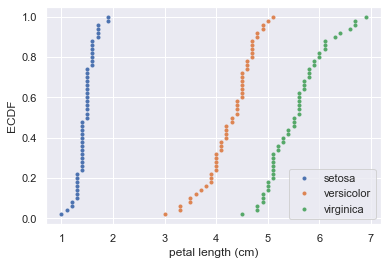

In [13]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker=".", linestyle="none")
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")
_ = plt.plot(x_virg, y_virg, marker=".", linestyle="none")

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

> Note: The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

## Onward toward the whole story!

> Important: “Exploratory data analysis can never be the
whole story, but nothing else can serve as the
foundation stone.”
 —John Tukey

# Quantitative exploratory data analysis

We will compute useful summary statistics, which serve to concisely describe salient features of a dataset with a few numbers.
 
## Introduction to summary statistics: The sample mean and median

$$
mean = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

> ### Outliers
● Data points whose value is far greater or less than
most of the rest of the data


> ### The median
● The middle value of a data set

> Note: An outlier can significantly affect the value of the mean, but not the median

### Computing means

The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using `np.mean()`.

In [14]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Percentiles, outliers, and box plots

### Computing percentiles

 We will compute the percentiles of petal length of _Iris versicolor_.

In [15]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

### Comparing percentiles to ECDF

To see how the percentiles relate to the ECDF, we will plot the percentiles of _Iris versicolor_ petal lengths on the ECDF plot.

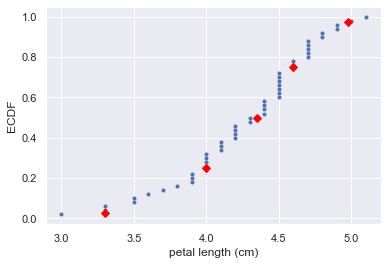

In [16]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle="none")

# Show the plot
plt.show()


### Box-and-whisker plot

> Warning: Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine.

We will Make a box plot of the iris petal lengths.

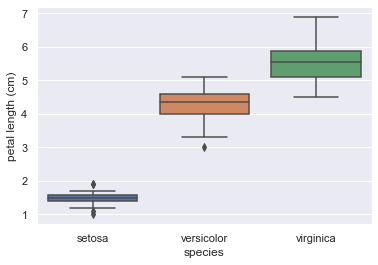

In [18]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(data=iris_petal_lengths, x="species", y="petal length (cm)")

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

# Show the plot
plt.show()


## Variance and standard deviation

> ### Variance
● The mean squared distance of the data from their
mean

> Tip: Variance; nformally, a measure of the spread of data

$$
variance = \frac{1}{n} \sum{i=1}^{n} (x_i - \bar{x})^2
$$
$$
std = \sqrt {\frac{1}{n} \sum{i=1}^{n} (x_i - \bar{x})^2}
$$